### Stock Forecasting MSFT Stock data - Exercise-4-Timothy Gregorian

In this analysis we will examine the stock data from the company Microsoft and try to train a neural model with the LSTM model to predict uptrends and downtrends in the future. The goal is to build a LSTM neural model that is able to forecast Microsoft stock data for the next 5 months. 

### Link to the Datasets
https://www.kaggle.com/datasets/muhammadatiflatif/complete-microsoft-stock-dataset-19862025

### Information about the dataset

The Microsoft dataset contains 9843 stock data entries from the date 1986-03-13 to 2025-04-06, with important variables like: date, open, high, low, close, adj_close and volume.

The main variable we will be focusing on are the variables date and close.

### Note
Throughout this project, I followed the lecturer's GitHub examples as well as the given links about the topic RNN/LSTM.

I only used AI as well as external sources when no examples or references were available in the provided Github scripts and if certain optimizations were necessary to improve the model's performance.

### Data Description

#### Microsoft (MSFT) Stock Dataset

Variables:

1) date: The trading day
2) open: Opening price of the stock on each trading day
3) high: The highest price reached during the trading day
4) low: The lowest price reached during the trading day
5) close: The final closing price  of the stock at market close
6) adj_close: Adjusted closing price after the corporate actions (usually splits or dividends)
7) volume: The total number of shares traded during the trading day.


### Import/Modules

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import keras
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [31]:
df = pd.read_csv("MSFT_1986-03-13_2025-04-06.csv")
df.head()

,date,open,high,low,close,adj_close,volume
0,1986-03-13 00:00:00-05:00,0.088542,0.101563,0.088542,0.097222,0.059707,1031788800
1,1986-03-14 00:00:00-05:00,0.097222,0.102431,0.097222,0.100694,0.061839,308160000
2,1986-03-17 00:00:00-05:00,0.100694,0.103299,0.100694,0.102431,0.062906,133171200
3,1986-03-18 00:00:00-05:00,0.102431,0.103299,0.098958,0.099826,0.061306,67766400
4,1986-03-19 00:00:00-05:00,0.099826,0.100694,0.097222,0.098090,0.060240,47894400


We do not need the other variables, only date and close, that is why we drop the other ones.

In [32]:
df = df.drop(columns=["open", "high", "low", "adj_close", "volume"])

For the forecasting, I first took 14 years of Microsoft stockdata from 2010 until 2024 to do long-term forecasts with the LSTM model, but I came to the conclusion, that in those 14 years, there were major events that messed up the stockmarket so drastically (for example Corona), that if the model is trained with that amount of stock data, it messes up the long term prediction. Therefore, I took 2 and a half years of Microsoft data. This resulted in an better R²-score as well.

In [33]:
df = df[(df["date"] >= "2023-01-01") & (df["date"] <= "2025-04-05")]
df.head()


,date,close
9277,2023-01-03 00:00:00-05:00,239.580002
9278,2023-01-04 00:00:00-05:00,229.100006
9279,2023-01-05 00:00:00-05:00,222.309998
9280,2023-01-06 00:00:00-05:00,224.929993
9281,2023-01-09 00:00:00-05:00,227.119995


In [34]:
df.tail()

,date,close
9838,2025-03-31 00:00:00-04:00,375.390015
9839,2025-04-01 00:00:00-04:00,382.190002
9840,2025-04-02 00:00:00-04:00,382.140015
9841,2025-04-03 00:00:00-04:00,373.109985
9842,2025-04-04 00:00:00-04:00,359.839996


In [35]:
len(df)

566

In [36]:
df

,date,close
9277,2023-01-03 00:00:00-05:00,239.580002
9278,2023-01-04 00:00:00-05:00,229.100006
9279,2023-01-05 00:00:00-05:00,222.309998
9280,2023-01-06 00:00:00-05:00,224.929993
9281,2023-01-09 00:00:00-05:00,227.119995
...,...,...
9838,2025-03-31 00:00:00-04:00,375.390015
9839,2025-04-01 00:00:00-04:00,382.190002
9840,2025-04-02 00:00:00-04:00,382.140015
9841,2025-04-03 00:00:00-04:00,373.109985


No duplicates in the dataset.

In [37]:
print(df.duplicated().sum())

0


Also no missing values.

In [38]:
print(df.isnull().sum())

date     0
close    0
dtype: int64


In [39]:
value_column = 'close'

In [40]:
scaler = MinMaxScaler()
df[[value_column]] = scaler.fit_transform(df[[value_column]])


df = df.drop("date", axis=1)
df.index = df.index * 0.1 + 1

In [41]:
df.head()

,close
928.7,0.070418
928.8,0.027686
928.9,0.000000
929.0,0.010683
929.1,0.019613


In [42]:
cutoff = int(len(df) * 0.8)

X_train = df.index[0:cutoff]
y_train = df[value_column].iloc[0:cutoff]

X_test = df.index[cutoff:]
y_test = df[value_column].iloc[cutoff:]

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

n_features = 1

train_series = y_train.reshape((len(y_train), n_features))
test_series  = y_test.reshape((len(y_test), n_features))

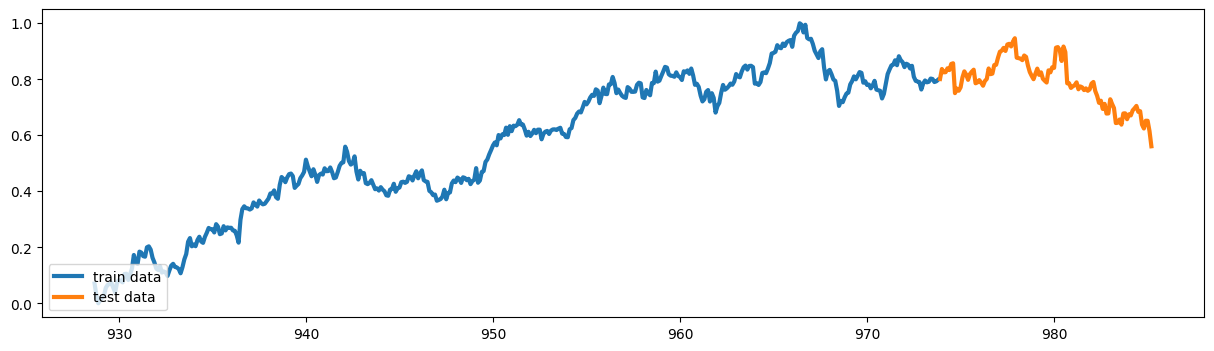

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(X_train,y_train, lw=3, label='train data')
ax.plot(X_test, y_test,  lw=3, label='test data')
ax.legend(loc="lower left")
plt.show()

I had to adjust the parameters look_back and batch_size so I could get a better R²-score. The higher I have gone with the look_back score the lower my R²-score got and the same goes to going lower as well. The optimal number for the variable look_back was 40 in this case.

I have also used the more modern tensorflow dataset version instead of the timeseries generator. 

In [44]:
from tensorflow.keras.utils import timeseries_dataset_from_array

look_back  = 40
batch_size = 16
window_size = 1

train_generator = timeseries_dataset_from_array(
    data=train_series,
    targets=train_series[look_back:],
    sequence_length=look_back,
    sampling_rate=1,
    sequence_stride=window_size,
    batch_size=batch_size,
    shuffle=False,
)

test_generator = timeseries_dataset_from_array(
    data=test_series,
    targets=test_series[look_back:],
    sequence_length=look_back,
    sampling_rate=1,
    sequence_stride=window_size,
    batch_size=batch_size,
    shuffle=False,
)

I have experimented a lot with the LSTM neural model structure and I have come to the conclusion, that for the dataset that the model gets trained with, which is 566, we do not need a too complex LSTM model structure.

The more complex I have made the model structure, the lower the R²-score and the higher my val_loss in the model training was. This goes the same if my model structure was too simple, with for example too few neurons in the LSTM and Dense layer.

In [45]:
from keras.models import Sequential
from keras import Input
from keras.layers import LSTM, SimpleRNN
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_model_MSFT_forecast.keras', monitor='val_loss', mode='min', save_best_only=True)
callback_list = [mc]


model = Sequential()
model.add(Input(shape=(look_back, n_features)))
model.add(LSTM(32, activation="relu"))
model.add(Dense(16, activation="relu"))


model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(train_generator, epochs=30, verbose=1, validation_data=test_generator, callbacks=callback_list)

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0902 - val_loss: 0.0081
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0121 - val_loss: 0.0015
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - val_loss: 0.0044
Epoch 9/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 10/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 11/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0029 - val_loss: 0.0033
Epoch 12/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027 - va

The values loss and val_loss dropped very low very fast after the first epoch, which is good.

<Axes: >

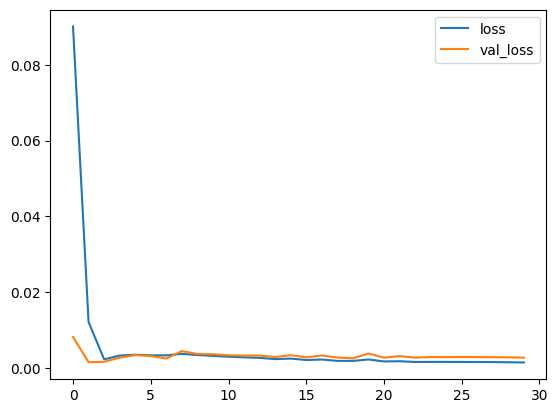

In [46]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [47]:
from keras.models import load_model
model = load_model("best_model_MSFT_forecast.keras")

The train evaluation results show low numbers in both training and testing loss, which means that the model generalizes well and is not overfitting.

In [48]:
result = model.evaluate(train_generator)
print(f"Training loss: {result}")

result = model.evaluate(test_generator)
print(f"Testing loss: {result}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 
Training loss: 0.002711112145334482
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015     
Testing loss: 0.0014603275340050459


In [49]:
test_predictions  = model.predict(test_generator)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


The model shows solid predictive performance. The MAE and MSE values are both very small, which means that the odel's errors are consistently low. The MSE value is close to zero, indicating almost no large deviations. An R² value of 0.81 shows that the overall model quality is solid.

In [50]:
actual_y_test = np.concatenate([y for x, y in test_generator])
errors = np.abs(actual_y_test - test_predictions)
mape = mean_absolute_percentage_error(actual_y_test, test_predictions) * 100

print("MAPE (mean average precision error):")
print(f"{round(mape, 2)} %")

print("\nMAE")
print(round(metrics.mean_absolute_error(actual_y_test, test_predictions), 2), "units")

print("\nMSE")
print(round(metrics.mean_squared_error(actual_y_test, test_predictions), 2), "units^2")

print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(actual_y_test, test_predictions)), 2), "units")

print('\nR-squared:')
print(round(metrics.r2_score(actual_y_test, test_predictions), 2))

MAPE (mean average precision error):
3.7 %

MAE
0.03 units

MSE
0.0 units^2

RMSE:
0.04 units

R-squared:
0.81


The red prediction line appears much smoother than the actual test data because the model captures the overall short-term trend but cannot fully reproduce the real market volatility, leading to forecasts that follow the direction but with reduced fluctuations.

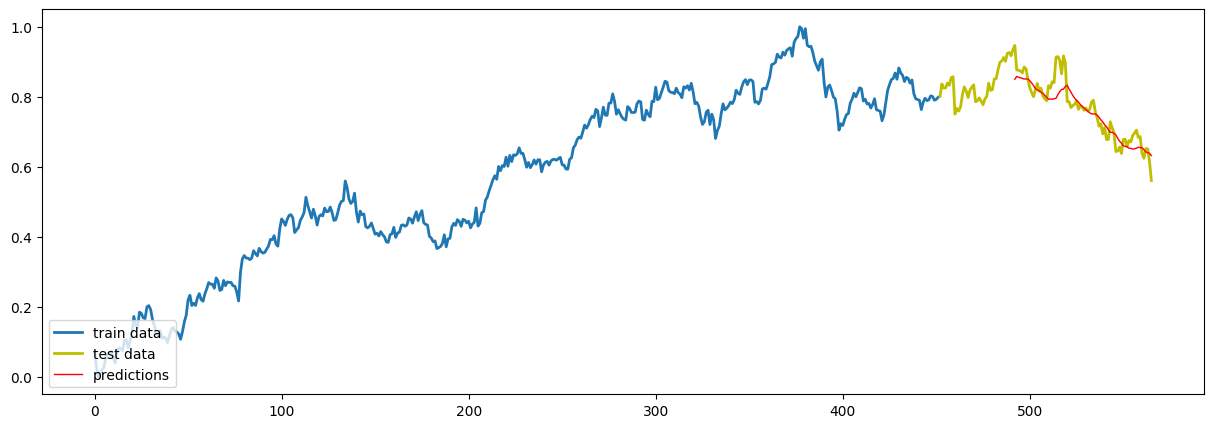

In [51]:
x1 = np.arange(0, len(y_train))
x2 = np.arange(len(y_train), len(y_train) + len(y_test))
x3 = np.arange(len(y_train) + look_back, len(y_train) + len(y_test))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x1, y_train, lw=2, label='train data')
ax.plot(x2, y_test, lw=2, c='y', label='test data')
ax.plot(x3, test_predictions, lw=1, c='r', label='predictions')
ax.legend(loc="lower left")
plt.show()

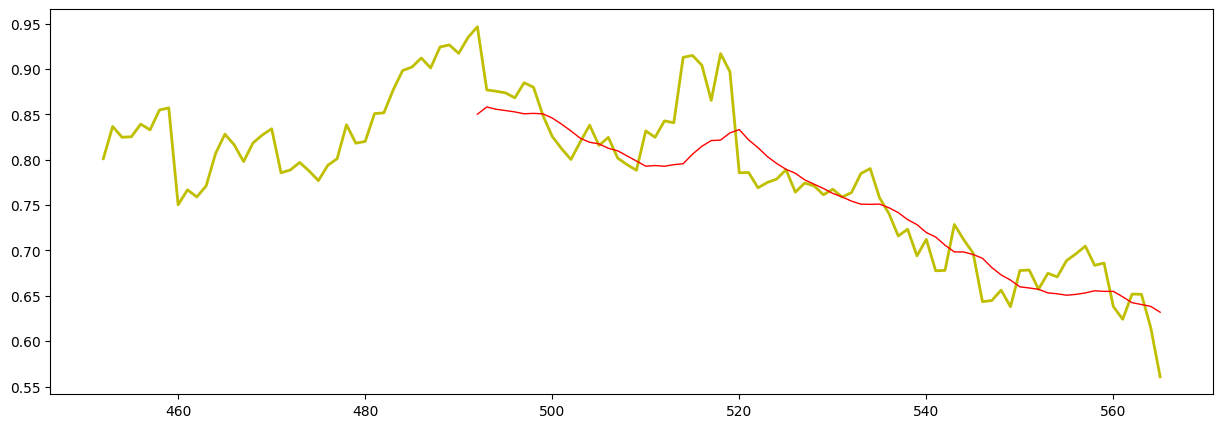

In [52]:
x1 = np.arange(0, len(y_train))
x2 = np.arange(len(y_train), len(y_train) + len(y_test))
x3 = np.arange(len(y_train) + look_back, len(y_train) + len(y_test))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# ax.plot(x1, y_train, lw=2, label='train data')
ax.plot(x2, y_test, lw=2, c='y', label='test data')
ax.plot(x3, test_predictions, lw=1, c='r', label='predictions')
# ax.legend(loc="lower left")
plt.show()

Both training loss and testing loss are very small and close to each other, meaning that the model learned the patterns in the training data well.

In [53]:
result = model.evaluate(train_generator)
print(f"Training loss: {result}")

result = model.evaluate(test_generator)
print(f"Testing loss: {result}")

 1/26 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0081

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027
Training loss: 0.002711112145334482
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0015    
Testing loss: 0.0014603275340050459


In [54]:
extrapolation = list()
seed_batch    = y_test[:look_back].reshape((1,look_back, n_features))
current_batch = seed_batch

for i in range(180):
    predicted_value = model.predict(current_batch, verbose=None)[0]
    extrapolation.append(predicted_value) 
    current_batch = np.append(current_batch[:,1:,:],[[predicted_value]],axis=1)

The model follows the general trend of the historical data but becomes smoother and less volatile when it predicts further into the future. Each new prediction is based on previous predicted values. Of course these kind of predictions do not have to be always true. 

For optimizations, I have increased the number of range in the for-loop.

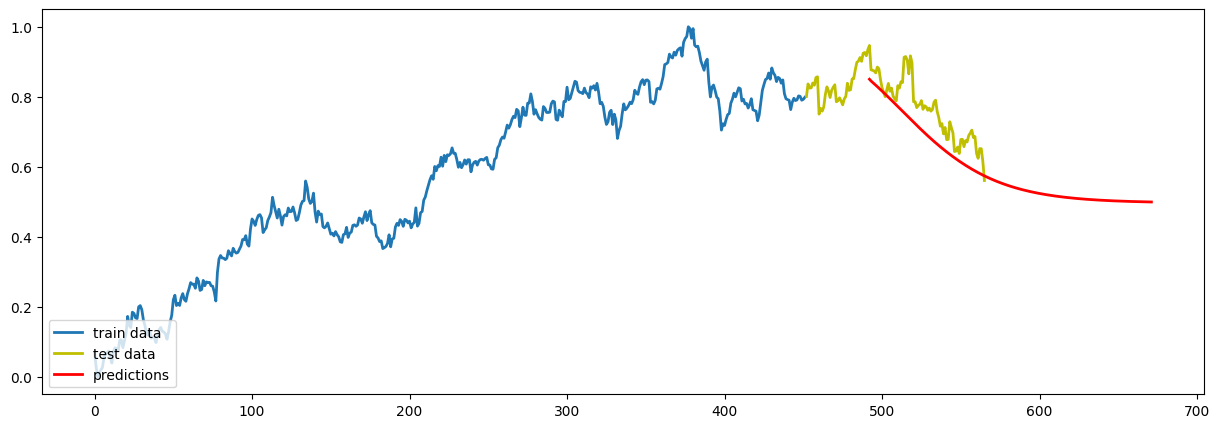

In [55]:
x1 = np.arange(0, len(y_train))
x2 = np.arange(len(y_train), len(y_train) + len(y_test))
x3 = np.arange(len(y_train) + look_back, len(y_train) + len(extrapolation) + look_back)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x1, y_train, lw=2, label='train data')
ax.plot(x2, y_test, lw=2, c='y', label='test data')
ax.plot(x3, extrapolation, lw=2, c='r', label='predictions')
ax.legend(loc="lower left")
plt.show()

In [56]:
df_extra = pd.DataFrame(data=extrapolation)

The table shows a statistical summary of 180 forecasted values. The mean predicted value is 0,59 with a standard deviation of 0,10, which is moderate. The minimum forecast is 0,49 and the maximum reaches up to 0,85, showing that the model expects values to stay within a relatively narrow range. 

In [57]:
df_extra.describe()

,0
count,180.000000
mean,0.593082
std,0.104722
min,0.499403
25%,0.508391
50%,0.544329
75%,0.657987
max,0.850202


We have a small variance value of 0,0109, which means that the predictions stay close together and do not vary much, which might indicate that the trained model produces stable predictions.

In [58]:

df_extra.var()

0    0.010967
dtype: float32

### Conclusion

I built and trained a LSTM model to forecast short term predictions on Microsoft data. Working with LSTMs was interesting but also very challenging to get stable or realistic predictions. Adjusting parameters like the "looking_back" value or the network complexity, changes the model behavior and improves the overall model quality score (R²).

In the finance sector, supply chain or even risk management this kind of technology could be useful. Unfortunately this project made me realize that stock prices are influenced by unpredictable market events, which means that even an a well-trained model cannot guarantee accurate long-term forecasts.

For optimizations, I would experiment more with different model architectures and see how the model predicts stock prices. Model architectures like using a hybrid model, in other words a mix of RNN and LSTM could potentially improve stock market forecasts.